# USA Milestone 2
Trend and Seasonality Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.tsa.seasonal import STL

In [8]:
df_usa_national = pd.read_csv('df_usa_national_ms1.csv')
df_usa_state = pd.read_csv('df_usa_state_ms1.csv')

In [9]:
# Convert date format
df_usa_national['Date'] = pd.to_datetime(df_usa_national['Date'])
df_usa_state['Date'] = pd.to_datetime(df_usa_state['Date'])

In [4]:
df_usa_national.head()

,Date,ConfirmedCases,ConfirmedDeaths,DailyCases,DailyDeaths,Cases_7dayAvg,Deaths_7dayAvg,ConfirmedCasesPerCapita,ConfirmedDeathsPerCapita,DailyCasesPerCapita,DailyDeathsPerCapita,Cases_7dayAvgPerCapita,Deaths_7dayAvgPerCapita,H6M_Facial Coverings
0,2020-01-01,0,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0
1,2020-01-02,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_usa_state.head()

,Date,RegionName,RegionCode,StateCodeShort,Outcome2016,Outcome2020,CensusPop2020,ConfirmedCases,ConfirmedDeaths,DailyCases,DailyDeaths,Cases_7dayAvg,Deaths_7dayAvg,ConfirmedCasesPerCapita,ConfirmedDeathsPerCapita,DailyCasesPerCapita,DailyDeathsPerCapita,Cases_7dayAvgPerCapita,Deaths_7dayAvgPerCapita,H6M_Facial Coverings
0,2020-01-01,Alaska,US_AK,AK,R,R,733391,0,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0
1,2020-01-02,Alaska,US_AK,AK,R,R,733391,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,Alaska,US_AK,AK,R,R,733391,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,Alaska,US_AK,AK,R,R,733391,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,Alaska,US_AK,AK,R,R,733391,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preparing Data for Analysis

In [10]:
df_usa_national = df_usa_national.set_index('Date')

In [11]:
df_usa_national_weekly_series = df_usa_national['DailyCases'].resample('W-SUN').sum()
df_usa_national_weekly = pd.DataFrame(df_usa_national_weekly_series).rename(columns={'DailyCases': 'WeeklyCases'})

In [17]:
wk = df_usa_national_weekly

## Trend-Seasonal-Residual Decomposition

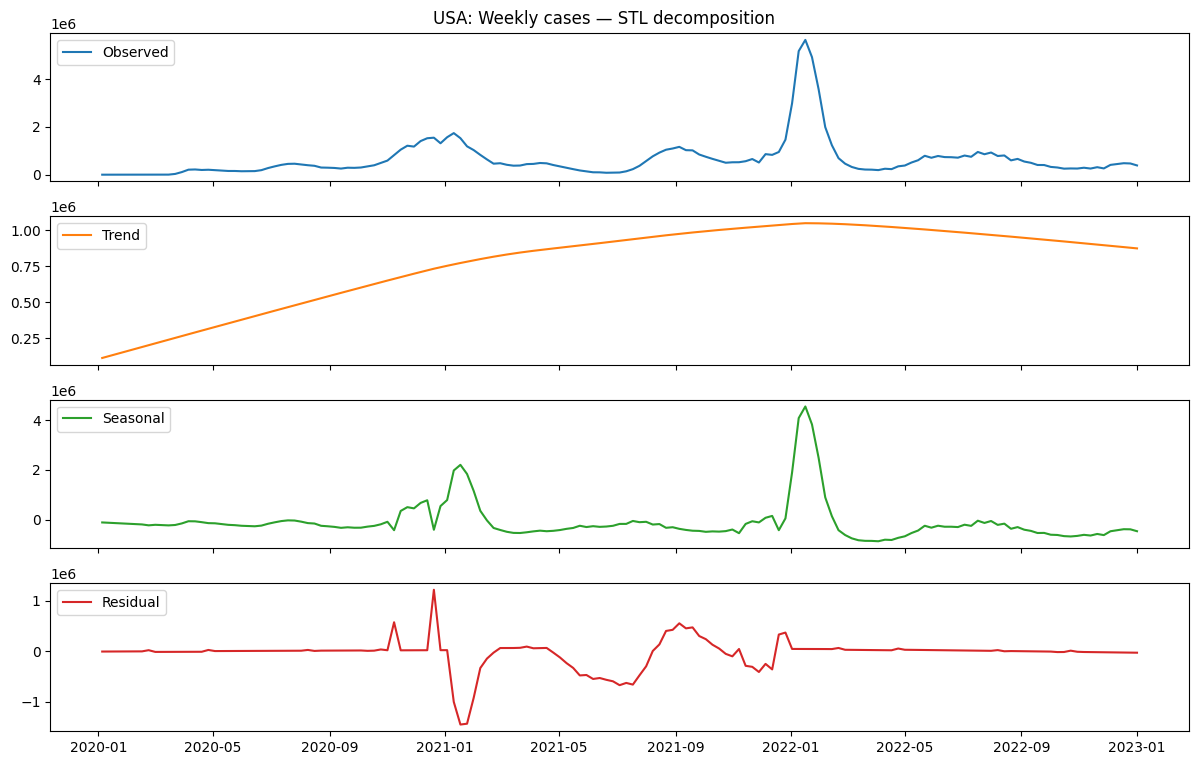

In [18]:
y = wk.astype(float).fillna(0.0)
stl = STL(y, period=52, robust=True)  # weekly data → ~52 periods per year
res = stl.fit()

fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
axes[0].plot(wk.index, res.observed, label='Observed'); axes[0].legend(loc='upper left')
axes[1].plot(wk.index, res.trend, color='C1', label='Trend'); axes[1].legend(loc='upper left')
axes[2].plot(wk.index, res.seasonal, color='C2', label='Seasonal'); axes[2].legend(loc='upper left')
axes[3].plot(wk.index, res.resid, color='C3', label='Residual'); axes[3].legend(loc='upper left')
plt.suptitle('USA: Weekly cases — STL decomposition', y=0.95)
plt.tight_layout()
plt.show()

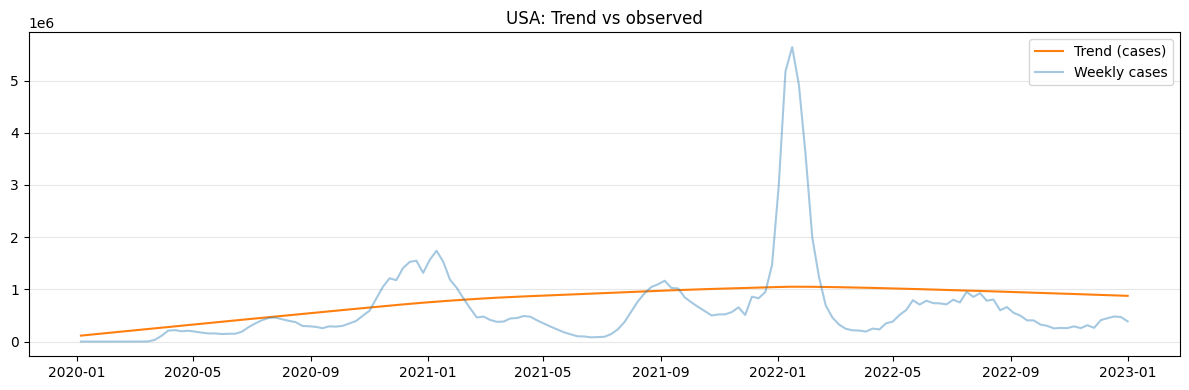

In [19]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(wk.index, res.trend, color='C1', label='Trend (cases)')
ax.plot(wk.index, wk, color='C0', alpha=0.4, label='Weekly cases')
ax.set_title('USA: Trend vs observed')
ax.legend(); ax.grid(True, axis='y', alpha=0.3)
plt.tight_layout(); plt.show()

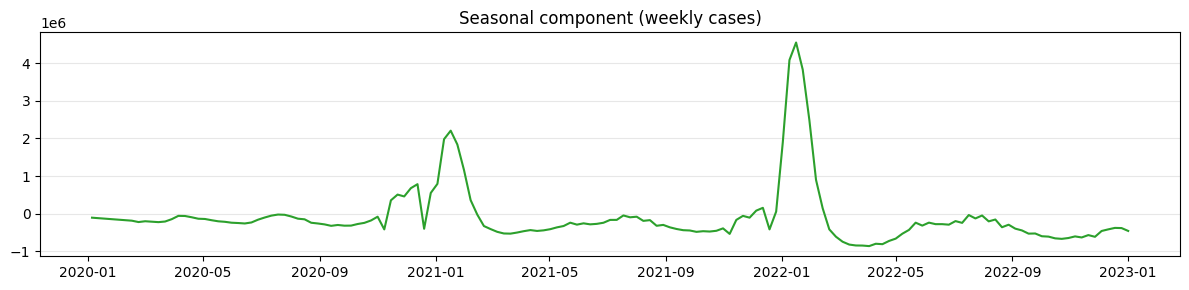

In [20]:
# 1) STL seasonal component
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(wk.index, res.seasonal, color='C2')
ax.set_title('Seasonal component (weekly cases)')
ax.grid(True, axis='y', alpha=0.3)
plt.tight_layout(); plt.show()



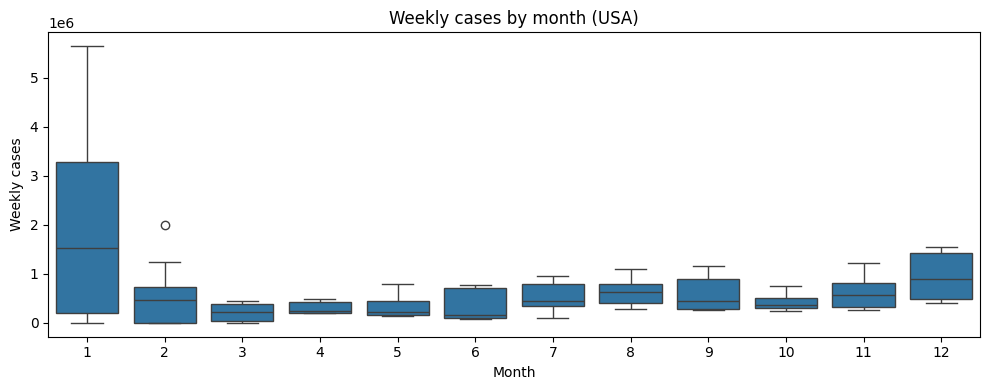

In [26]:
# 2) Month-of-year seasonal plot (calendar view)
mview = wk.assign(month=wk.index.month, year=wk.index.year).dropna()
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(data=mview, x='month', y='WeeklyCases', ax=ax)
ax.set_title('Weekly cases by month (USA)')
ax.set_xlabel('Month'); ax.set_ylabel('Weekly cases')
plt.tight_layout(); plt.show()